### Dataset utilizado

* Foi utilizado para a resolução um dataset sobre doenças cardíacas realizado pela University of California Irvine (UCI), disponível no endereço abaixo:

* https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### Variáveis utilizadas

> ## Id
> ***

Id único para cada pessoa entrevistada.

> ## Age
> ***

Idade da pessoa na data de referência em anos. (79% male - 21% female)

> ## Sex
> ***

Sexo da pessoa por extenso.

> ## Dataset
> ***

Local de coleta dos dados.

> ## Cp
> ***

Tipo de dor no peito.

> ## Trestbps
> ***

Pressão arterial em repouso.

> ## Chol
> ***

Medida de colesterol.

> ## FBS
> ***

Açúcar no sangue em jejum.

> ## Restecg
> ***

Observação de eletrocardiograma em repouso.

> ## Thalch
> ***

Frequência cardíaca máxima alcançada.

> ## Exang
> ***

Angina induzida por exercício físico.

> ## Oldpeak
> ***

Infradesnivelamento do segmento ST induzido pelo exercício em relação ao repouso.

> ## Slope
> ***

A inclinação do pico do segmento ST do exercício.

> ## CA
> ***

Número de vasos principais (0-3) coloridos por fluoroscopia.

> ## Thal
> ***

Doença hereditária caracterizada por um defeito na síntese de hemoglobina

> ## Num
> ***

Ausência ou presença (estágios de 1 a 4) de doença cardíaca.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

* Tratamento dos dados


In [ ]:
# Salvando o dataset em um dataframe pandas
df = pd.read_csv("/content/heart_disease_uci.csv")

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Retirando linhas com valores nulos
df.dropna(inplace = True)
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
# Retirando a coluna 'id'
df = df.drop('id', axis=1)

In [ ]:
# criando uma coluna com grupos de idade, para facilitar criação de tabelas
age_group = [29, 40, 50, 60, 70, 77]
labels = ['29-40', '41-50', '51-60', '61-70', '71-77']
df['age group'] = pd.cut(
    x = df.age,
    bins = age_group,
    labels = labels,
    include_lowest = True
)

<ipython-input-101-a13bc2ec3a41>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


<Axes: >

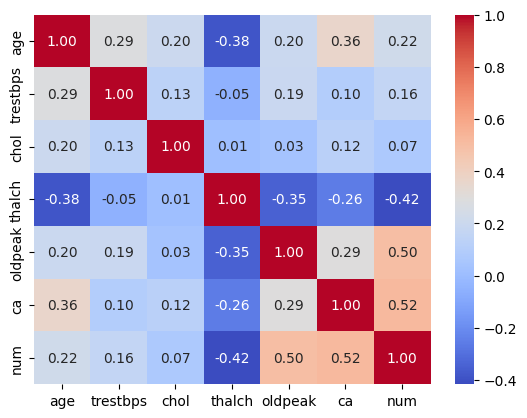

In [ ]:
# Identificando correlação entre colunas
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

* Analisando a correlação entre as colunas, focando nos valores que se relacionam a coluna 'num' (que representa a presença de doença cardíaca e seus estágios), é possível notar que existe uma considerável interferência positiva com as colunas 'oldpeak' (Infradesnivelamento do segmento ST induzido pelo exercício em relação ao repouso) e 'ca' (número de vasos principais coloridos por fluoroscopia), ou seja, quanto maiores os valores desses dois dados, maior a chance do entrevistado possuir doenças cardíacas.

* Além disso, também indentificamos uma correlação negativa significativa entre a coluna alvo e o valor de 'thalch' (frequência cardíaca máxima alcançada), onde é possível perceber indícios de uma relação inversamente proporcional entre os dados.

In [ ]:
# target [0=no heart disease; 1,2,3,4 = stages of heart disease ]
num = {0: 'no heart disease',
       1: 'stage 1',
       2: 'stage 2',
       3: 'stage 3',
       4: 'stage 4'}

In [ ]:
crosstab_sex_hd = pd.crosstab(df.sex, df.num)
crosstab_sex_hd = crosstab_sex_hd.div(crosstab_sex_hd.sum(axis=1), axis=0) * 100
crosstab_sex_hd

num,0,1,2,3,4
sex,,,,,
Female,73.958333,9.375000,7.291667,7.291667,2.083333
Male,43.842365,23.152709,13.793103,13.793103,5.418719


<Axes: xlabel='sex'>

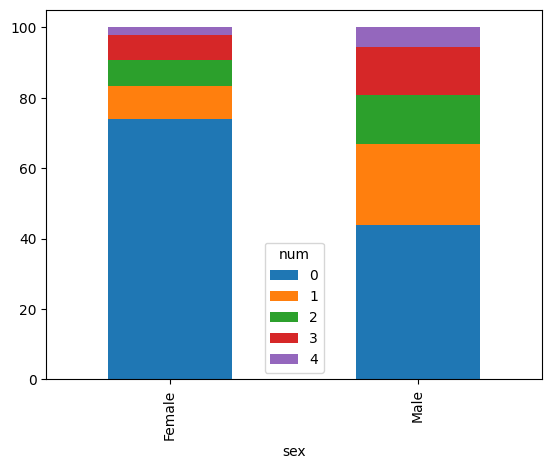

In [ ]:
crosstab_sex_hd.plot(kind='bar', stacked=True)

* De acordo com o gráfico acima, é notável uma grande diferença em relação ao sexo dos entrevistados, onde os registros apontam que a presença de doença cardíaca é mais frequentemente identificada entre homens do que em mulheres.

In [ ]:
df.age.max()

77

In [ ]:
df.age.min()

29

In [ ]:
crosstab_age_hd = pd.crosstab(df['age group'], df.num)
crosstab_age_hd = crosstab_age_hd.div(crosstab_age_hd.sum(axis=1), axis=0) * 100
crosstab_age_hd

num,0,1,2,3,4
age group,,,,,
29-40,64.705882,17.647059,0.000000,11.764706,5.882353
41-50,69.736842,14.473684,6.578947,7.894737,1.315789
51-60,48.031496,22.047244,12.598425,13.385827,3.937008
61-70,41.095890,19.178082,19.178082,13.698630,6.849315
71-77,83.333333,0.000000,0.000000,0.000000,16.666667


<Axes: xlabel='age group'>

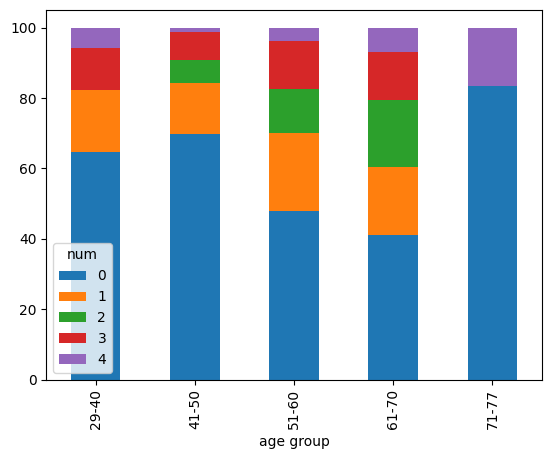

In [ ]:
crosstab_age_hd.plot(kind='bar', stacked=True)

* Em relação à idade, é percebível que as doenças cardíacas afetam majoritariamente pessoas entre 50 e 70 anos, enquanto, acima de 70, é identificada uma porcentagem maior de doenças em estágios bem avançados.

In [ ]:
df.trestbps.min()

94.0

In [ ]:
bps_group = [94, 115, 136, 157, 178, 200]
labels = ['94-114', '115-135', '136-156', '157-177', '178-200']
df['trestbps group'] = pd.cut(
    x = df.trestbps,
    bins = bps_group,
    labels = labels,
    include_lowest = True
)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age group,trestbps group
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,61-70,136-156
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,61-70,157-177
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,61-70,115-135
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,29-40,115-135
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,41-50,115-135


In [ ]:
crosstab_age_trestbps = pd.crosstab(df['trestbps group'], df.num)
crosstab_age_trestbps = crosstab_age_trestbps.div(crosstab_age_trestbps.sum(axis=1), axis=0) * 100
crosstab_age_trestbps

num,0,1,2,3,4
trestbps group,,,,,
94-114,61.538462,17.307692,9.615385,7.692308,3.846154
115-135,55.797101,17.391304,11.594203,13.043478,2.173913
136-156,51.219512,21.951220,10.975610,8.536585,7.317073
157-177,36.363636,18.181818,18.181818,18.181818,9.090909
178-200,20.000000,20.000000,20.000000,40.000000,0.000000


<Axes: xlabel='trestbps group'>

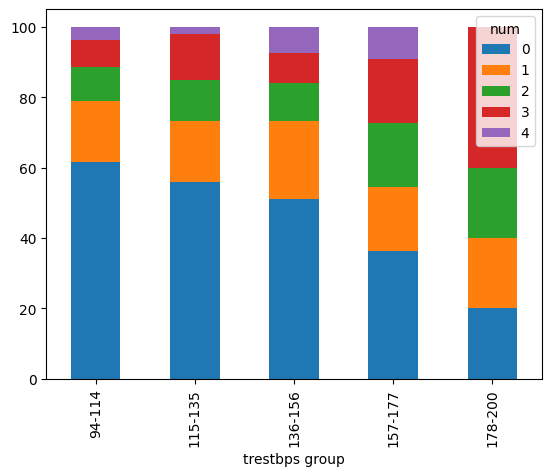

In [ ]:
crosstab_age_trestbps.plot(kind='bar', stacked=True)

* Cruzando os dados das medidas de pressão arterial com a coluna alvo, notamos uma clara relação entre índices de pressão alta com a presença de doenças, onde à medida que os valores da coluna 'trestbps' aumentam, é possível perceber cada vez menos casos de pessoas diagnosticadas sem nenhuma doença cardíaca.

In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488
std,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409
min,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


<Axes: title={'center': 'Distribuição de Frequência - Doença Cardíaca'}, xlabel='Presença de doença cardíaca', ylabel='Count'>

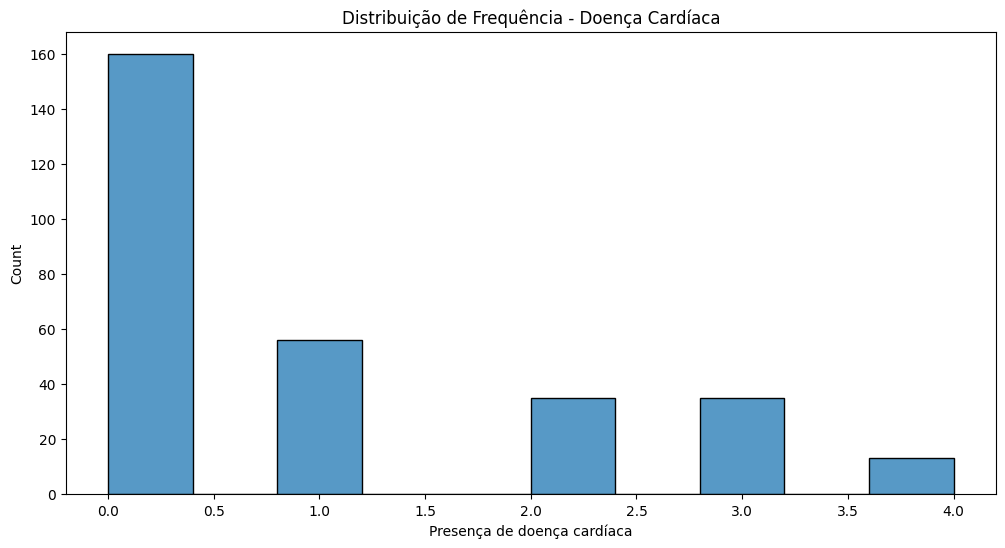

In [ ]:
ax = sns.histplot(df.num)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência - Doença Cardíaca')
ax.set_xlabel('Presença de doença cardíaca')
ax

<Axes: title={'center': 'Distribuição de Frequência - Pressão arterial'}, xlabel='Pressão arterial (mm/Hg)', ylabel='Count'>

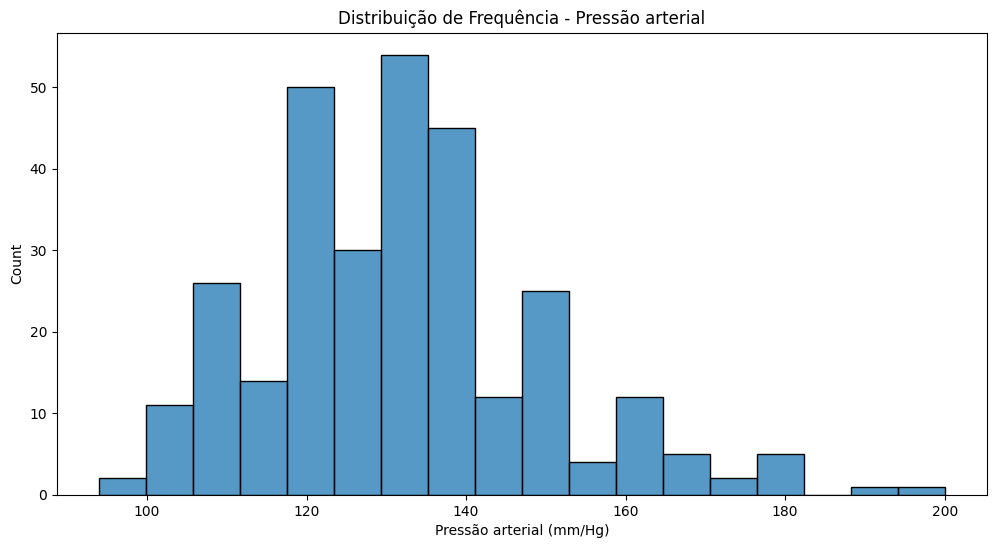

In [ ]:
ax = sns.histplot(df.trestbps)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência - Pressão arterial')
ax.set_xlabel('Pressão arterial (mm/Hg)')
ax

<Axes: title={'center': 'Distribuição de Frequência - Colesterol'}, xlabel='Colesterol (mg/dl)', ylabel='Count'>

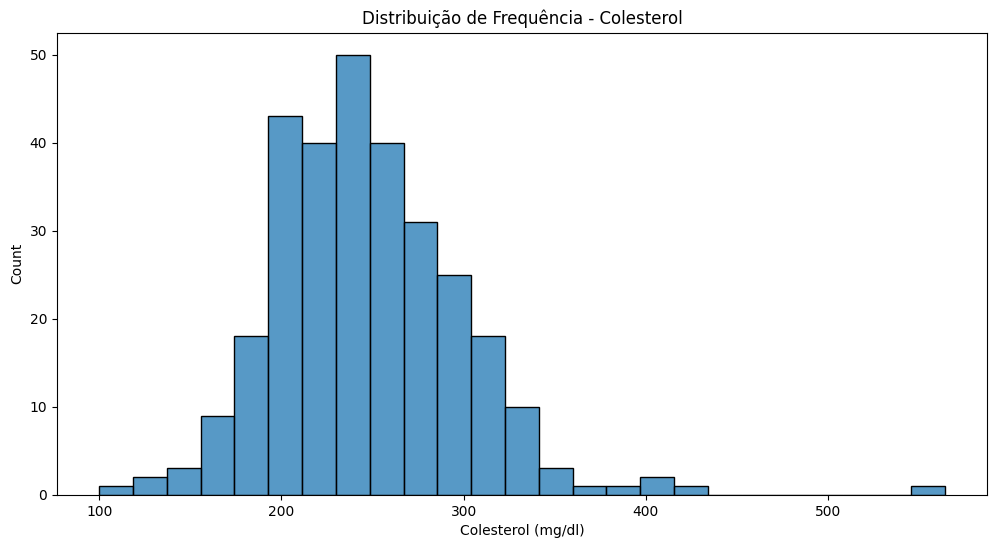

In [ ]:
ax = sns.histplot(df.chol)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência - Colesterol')
ax.set_xlabel('Colesterol (mg/dl)')
ax

In [ ]:
hd_chol = df.groupby(['num']).agg({'chol': ['mean', 'median', 'max', 'std']})
hd_chol

chol                         
           mean median    max        std
num                                     
0    243.493750  235.5  564.0  53.757550
1    246.071429  248.5  335.0  45.110312
2    260.857143  254.0  409.0  53.675574
3    246.457143  256.0  353.0  51.741065
4    253.384615  231.0  407.0  66.287931

In [ ]:
hd_trestbps = df.groupby(['num']).agg({'trestbps': ['mean', 'median', 'max', 'std']})
hd_trestbps

trestbps                         
           mean median    max        std
num                                     
0    129.175000  130.0  180.0  16.373990
1    133.339286  130.0  192.0  18.092969
2    134.371429  134.0  180.0  18.125519
3    135.457143  130.0  200.0  21.660947
4    138.769231  145.0  165.0  17.186011

### PCA


In [ ]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age group,trestbps group
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,61-70,136-156
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,61-70,157-177
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,61-70,115-135
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,29-40,115-135
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,41-50,115-135


In [ ]:
df = df.drop(['age group', 'trestbps group'], axis=1)

In [ ]:
X = df.iloc[:, 0:14].values
X

array([[63, 'Male', 'Cleveland', ..., 'downsloping', 0.0, 'fixed defect'],
       [67, 'Male', 'Cleveland', ..., 'flat', 3.0, 'normal'],
       [67, 'Male', 'Cleveland', ..., 'flat', 2.0, 'reversable defect'],
       ...,
       [57, 'Female', 'Cleveland', ..., 'flat', 1.0, 'normal'],
       [47, 'Male', 'Hungary', ..., 'flat', 0.0, 'reversable defect'],
       [56, 'Male', 'VA Long Beach', ..., 'flat', 0.0,
        'reversable defect']], dtype=object)

In [ ]:
y = df.iloc[:, 14].values
y

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3, 1,
       1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4, 3,
       1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1, 0, 1,
       0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 4, 2, 2,
       1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4, 2, 0, 0, 1,
       0, 2, 2, 1, 0, 3, 1, 1, 2, 3, 1, 1, 1])

In [ ]:
le_age = LabelEncoder()
le_sex = LabelEncoder()
le_dataset = LabelEncoder()
le_cp = LabelEncoder()
le_fbs = LabelEncoder()
le_restecg = LabelEncoder()
le_exang = LabelEncoder()
le_slope = LabelEncoder()
le_thal = LabelEncoder()

In [ ]:
X[:,0] = le_age.fit_transform(X[:,0])
X[:,1] = le_sex.fit_transform(X[:,1])
X[:,2] = le_dataset.fit_transform(X[:,2])
X[:,3] = le_cp.fit_transform(X[:,3])
X[:,6] = le_fbs.fit_transform(X[:,6])
X[:,7] = le_restecg.fit_transform(X[:,7])
X[:,9] = le_exang.fit_transform(X[:,9])
X[:,11] = le_slope.fit_transform(X[:,11])
X[:,13] = le_thal.fit_transform(X[:,13])

In [ ]:
X.shape

(299, 14)

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X

array([[ 0.95482499,  0.68768191, -0.0778237 , ..., -2.26429883,
        -0.71830622, -2.27655411],
       [ 1.40584027,  0.68768191, -0.0778237 , ..., -0.64073684,
         2.48726932, -0.56627853],
       [ 1.40584027,  0.68768191, -0.0778237 , ..., -0.64073684,
         1.41874414,  1.14399704],
       ...,
       [ 0.27830207, -1.4541607 , -0.0778237 , ..., -0.64073684,
         0.35021896, -0.56627853],
       [-0.84923613,  0.68768191,  7.67860463, ..., -0.64073684,
        -0.71830622,  1.14399704],
       [ 0.16554825,  0.68768191, 15.43503295, ..., -0.64073684,
        -0.71830622,  1.14399704]])

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20)

In [ ]:
X_treino.shape, X_teste.shape

((239, 14), (60, 14))

10 colunas

In [ ]:
p = 10

pca = PCA(n_components=p)

In [ ]:
X_treino_pca = pca.fit_transform(X_treino)
X_teste_pca = pca.fit_transform(X_teste)

In [ ]:
X_treino_pca.shape, X_teste_pca.shape

((239, 10), (60, 10))

In [ ]:
total_variancia = pca.explained_variance_ratio_.sum()
print(f'O modelo PCA com {p} variáveis explica{100*(total_variancia): .2f} % dos dados de entrada')

O modelo PCA com 10 variáveis explica 93.90 % dos dados de entrada


8 colunas

In [ ]:
p = 8

pca = PCA(n_components=p)

In [ ]:
X_treino_pca = pca.fit_transform(X_treino)
X_teste_pca = pca.fit_transform(X_teste)

In [ ]:
X_treino_pca.shape, X_teste_pca.shape

((239, 8), (60, 8))

In [ ]:
pca.explained_variance_ratio_

array([0.25456246, 0.1506094 , 0.10660105, 0.09271355, 0.07783467,
       0.06433782, 0.06130649, 0.05123897])

In [ ]:
total_variancia = pca.explained_variance_ratio_.sum()
print(f'O modelo PCA com {p} variáveis explica{100*(total_variancia): .2f} % dos dados de entrada')

O modelo PCA com 8 variáveis explica 85.92 % dos dados de entrada


12 colunas


In [ ]:
p = 12

pca = PCA(n_components=p)

In [ ]:
X_treino_pca = pca.fit_transform(X_treino)
X_teste_pca = pca.fit_transform(X_teste)

In [ ]:
X_treino_pca.shape, X_teste_pca.shape

((239, 12), (60, 12))

In [ ]:
pca.explained_variance_ratio_

array([0.25456246, 0.1506094 , 0.10660105, 0.09271355, 0.07783467,
       0.06433782, 0.06130649, 0.05123897, 0.0427388 , 0.03703867,
       0.02392453, 0.02102015])

In [ ]:
total_variancia = pca.explained_variance_ratio_.sum()
print(f'O modelo PCA com {p} variáveis explica{100*(total_variancia): .2f} % dos dados de entrada')

O modelo PCA com 12 variáveis explica 98.39 % dos dados de entrada


modelo de classificação

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=40, random_state=0)

In [ ]:
y_treino.shape

(239,)

In [ ]:
modelo_rf.fit(X_treino_pca, y_treino)

RandomForestClassifier(n_estimators=40, random_state=0)

In [ ]:
previsoes = modelo_rf.predict(X_teste_pca)

In [ ]:
previsoes

array([0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 0, 3, 0, 0, 3, 0, 3, 1, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 1, 0, 3, 0])

In [ ]:
y_teste

array([2, 0, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       4, 3, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 3, 0, 4, 1, 0, 0, 0,
       0, 3, 0, 0, 0, 4, 1, 0, 0, 3, 0, 1, 2, 0, 0, 1])

In [ ]:
acuracia = accuracy_score(y_teste, previsoes)
print(f'A acurácia do modelo Random Forest é de:{(100*acuracia): .2f} %')

A acurácia do modelo Random Forest é de: 50.00 %
